<a href="https://colab.research.google.com/github/pragnavi/Machine-Learning/blob/master/Optimal_Lambda_MPG_Piecewise_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [146]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Data**

In [147]:
names = ['mpg', 'cylinders','displacement', 'horsepower', 
         'weight', 'acceleration', 'model year', 'origin', 'car name']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')
df = df.dropna()
df = df.sort_values(by=['horsepower'])

**Transforming Input Data**

Transform the input data to form a data matrix X with multiple columns.

In [148]:
X = df['horsepower'].values
y = df['mpg'].values
Lambda = np.arange(np.min(X), np.max(X), .1)
Lambda = np.around(L, decimals = 2)
lambda_opt = np.min(X)
minloss = float("inf")
nsamp = X.shape[0]
X = X.reshape([nsamp,1])

zeros = np.zeros((nsamp,1))
ones = np.ones((nsamp,1))
X_orig = X
X_mod = np.hstack((ones,X_orig))
X = np.hstack((X_mod,zeros))

**Finding Lambda for Optimal Fit**

The ouput/prediction function is defined on the values of xi<λ≤xi (i ranging from 1 to n-sample size of the predictor column). Thus, the possible value of λ that gives the optimal fit lies between the minimum value of the predictor column and the maximum value of the predictor column.

In [149]:
for l in Lambda:
  Xtemp = np.copy(X)
  for row in Xtemp:
    if(row[1]>=l):
      row[2]=row[1]-l
      row[1]=l
  out = np.linalg.lstsq(Xtemp,y)
  beta = out[0]
  yp = Xtemp@beta
  errs = y-yp
  loss = np.sum(errs**2)
  if loss<minloss:
    minloss = loss
    lambda_opt = l
    ypred = yp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [150]:
print("Loss at optimal beta and lamda: ", minloss)
print("The value of lambda that gives the optimal fit: ", lambda_opt)

Loss at optimal beta and lamda:  7418.6508564538935
The value of lambda that gives the optimal fit:  103.1


**Plot - MPG vs Horsepower with Piecewise Regression Line (Optimal Lambda)**

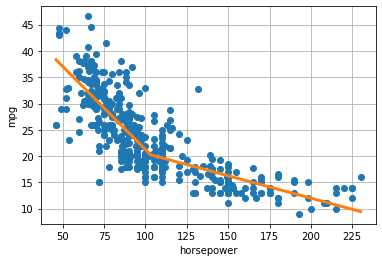

In [151]:
x = df['horsepower'].values

plt.plot(x, y,'o')
plt.plot(x, ypred,'-',linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)